# *WORKING file:* Species abundance model
### Description:
Create a tutorial for a marine species abundance model in python. This notebook was created at the PACE Hackweek 2025. Our use-case will be with [NOAA NEFSC bottom trawl](https://www.fisheries.noaa.gov/new-england-mid-atlantic/science-data/2025-spring-bottom-trawl-survey-completed-northeast) data, specifically longfin squid.


![longfin squid!](https://img.freepik.com/free-vector/hand-drawn-squid-illustration_23-2149560574.jpg?semt=ais_hybrid&w=740&q=80)
### Authors: 
* Haley Synan (NOAA Fisheries/IBSS)
* Artem Dzhulai (URI)
* Sajna Hussain
* Natalie McCourt (UMBC)
### History:
>*8/4/25: notebook initialized*


### Run command to get push access to our SDM repo
gh-scoped-creds

# STEPS
* [x] Get fisheries data
* [ ] Preliminary analysis of ALL species abundance
* [ ] Match the PACE data
* [ ] Match GLORYS data 
* [ ] Choose explanatory variables
    * PAR
    * KD490
    * MOANA
    * phyto_carbon
* [ ] Match data
* [ ] Run model (xgboost) 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cartopy
import numpy as np

In [2]:
os.chdir(r'/home/jovyan/Hackweek2025/proj_2025_sdm/data')
df = pd.read_csv('fisheries_with_pace_rrs_avw2.csv') #read data 
sub = df[['TOWDATETIME_EST','LAT','LON','MEAN_DEPTH','SWEPT_AREA_km','longfin squid']] #subset relevant variables

/tmp/ipykernel_6900/87989929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['station'] = np.arange(1,len(sub)+1) #add station col


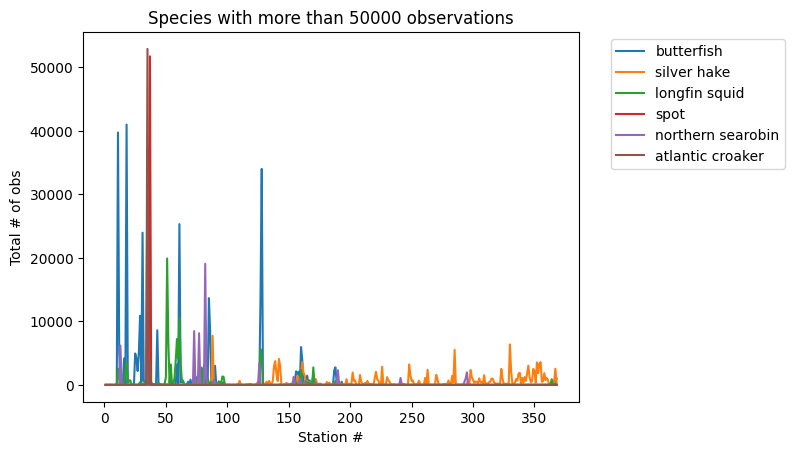

In [7]:
matched=[]
for item in df.columns:
    if 'Rrs' in item:  # Using the 'in' operator for substring check
        pass
    else: 
        matched.append(item)

sub = df[list(matched)] #subset (remove RRS columns) 
sub['station'] = np.arange(1,len(sub)+1) #add station col

tot_sum = {}
for s in sub.columns[5:-2]:
   tot_sum.update({s:int(sub[s].sum())})  #get total sum of all values 

sorted_tot_sum = sorted(tot_sum.items(), key=lambda item: item[1],reverse=True) #sort 


abu=[]
for val in sorted_tot_sum:
    if val[1]>50000: #if more than 10000 observations 
        abu.append(val[0])


#plot max valeus 
for s in sub[abu].columns:
    plt.plot(sub.station, sub[s],label=s)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.xlabel('Station #')
plt.ylabel('Total # of obs')
plt.title('Species with more than 50000 observations')
plt.show()

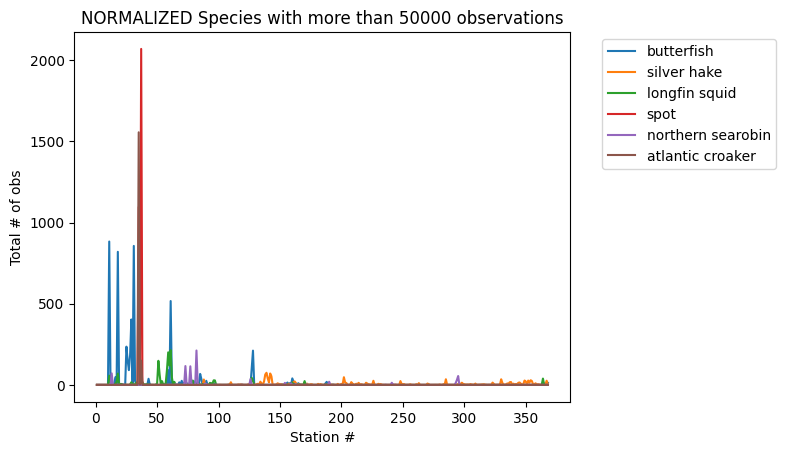

In [5]:
for s in sub[abu].columns:
    plt.plot(sub.station, sub[s]/sub.MEAN_DEPTH,label=s)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.xlabel('Station #')
plt.ylabel('Total # of obs')
plt.title('NORMALIZED Species with more than 50000 observations')
plt.show()

Text(0.5, 0.98, 'Species presence by station')

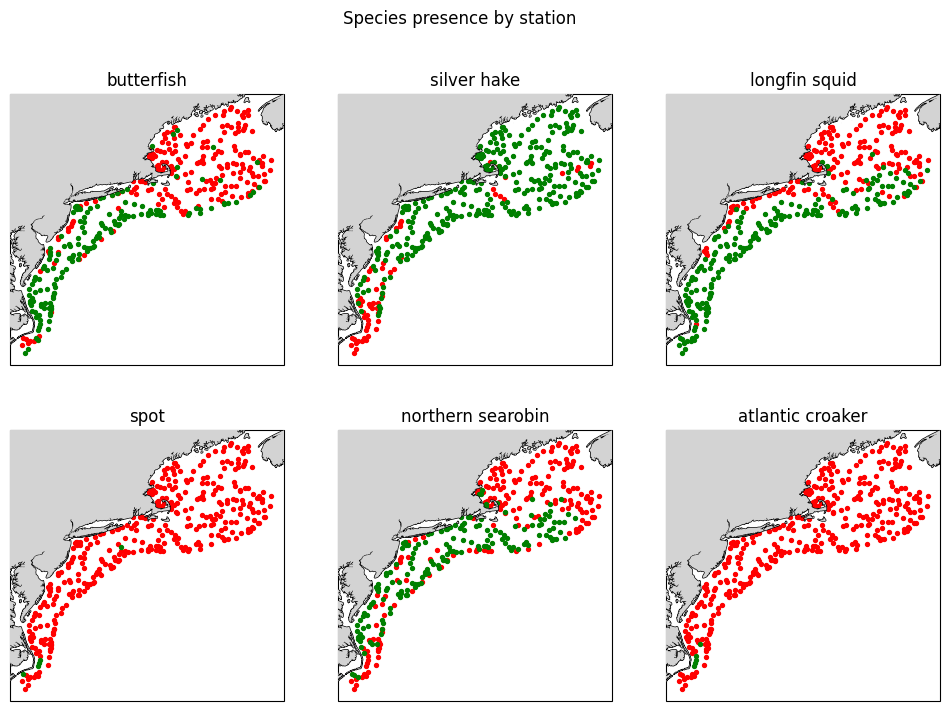

In [40]:
# Create a figure and a 3x2 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8),subplot_kw={'projection': cartopy.crs.PlateCarree()}) 

# Flatten the axs array for easy iteration if needed, though direct indexing works too
axs = axs.flatten() 

# Example data for plotting
x = np.linspace(0, 10, 100)

# Loop through each subplot and plot data
for i, ax in enumerate(axs):
    ax.scatter(sub[sub[sub[abu].columns[i]]==0].LON, sub[sub[sub[abu].columns[i]]==0].LAT,c='r',s=8,label='no')
    ax.scatter(sub[sub[sub[abu].columns[i]]!=0].LON, sub[sub[sub[abu].columns[i]]!=0].LAT,c='g',s=8)
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=1) #add coastlines
    ax.add_feature(cartopy.feature.LAND, zorder=100, facecolor='lightgrey') #add land mask 
    ax.set_title(sub[abu].columns[i])
fig.suptitle('Species presence by station')